In [1]:
import polars as pl
import plotnine as p9

In [2]:
date_str = "20260202_183354"

In [3]:
APP_PATH = fr"C:\Users\ccodi\Documents\prog\python\polytraderupdown\logs\run_{date_str}\app.jsonl"
BINANCE_PATH = fr"C:\Users\ccodi\Documents\prog\python\polytraderupdown\logs\run_{date_str}\binance.jsonl"
MET_PATH = fr"C:\Users\ccodi\Documents\prog\python\polytraderupdown\logs\run_{date_str}\metrics.jsonl"
PM_PATH = fr"C:\Users\ccodi\Documents\prog\python\polytraderupdown\logs\run_{date_str}\polymarket_clob.jsonl"
CH_PATH = fr"C:\Users\ccodi\Documents\prog\python\polytraderupdown\logs\run_{date_str}\polymarket_rtds.jsonl"

app = pl.read_ndjson(APP_PATH).sort("ts_local_ms")
bn = pl.read_ndjson(BINANCE_PATH).sort("ts_local_ms")
mt = pl.read_ndjson(MET_PATH).sort("ts_local_ms")
pm = pl.read_ndjson(PM_PATH).sort("ts_local_ms")
ch = pl.read_ndjson(CH_PATH).sort("ts_local_ms")

C:\Users\ccodi\miniconda3\envs\polymarket\Lib\site-packages\plotnine\geoms\geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


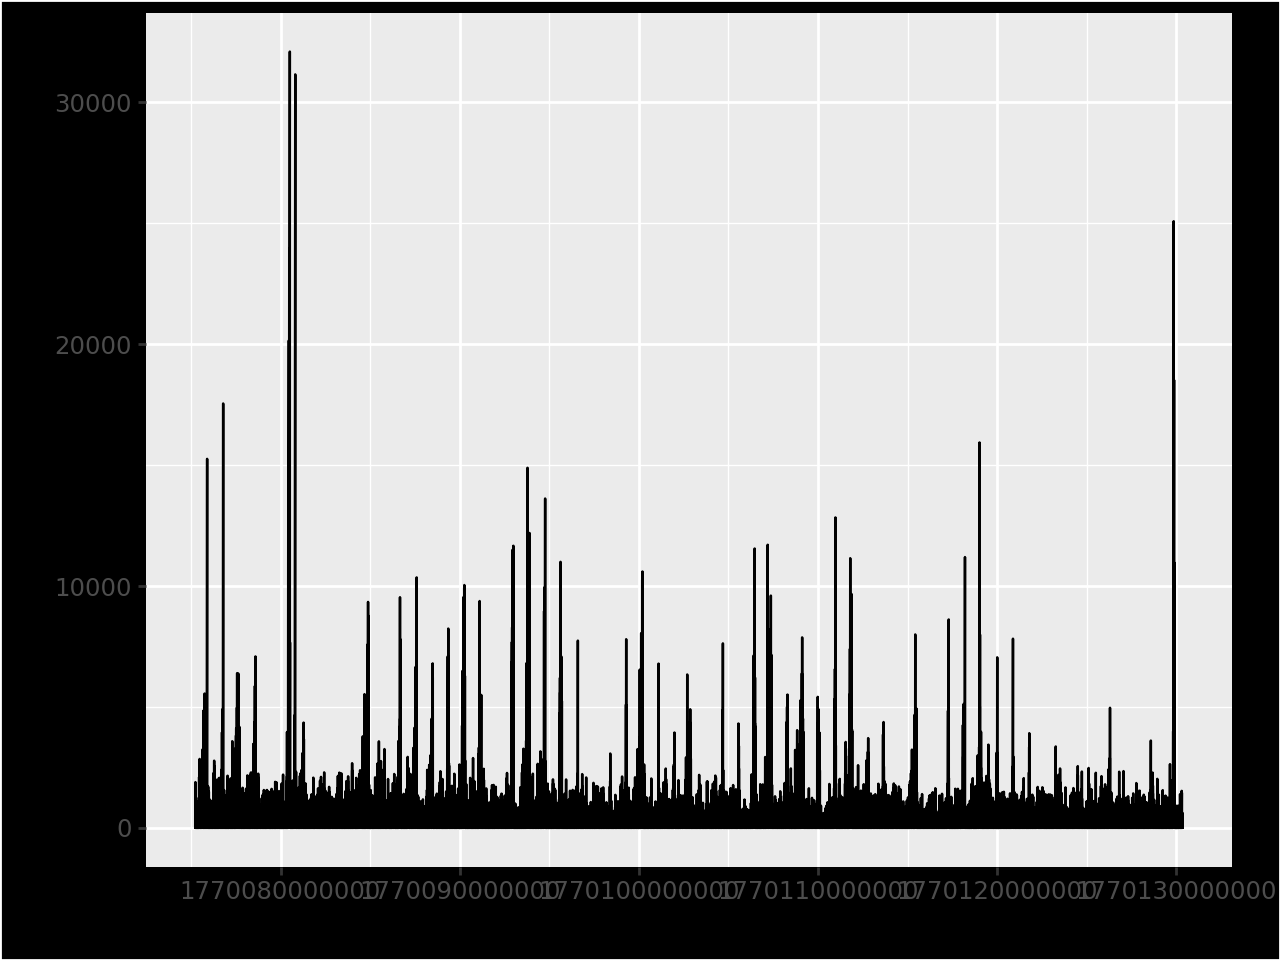

In [4]:
(
    pm
    .filter(pl.col("type") == "book")
    .with_columns(
        pl.col('ts_local_ms').diff().alias("diff"),
    )
    .pipe(p9.ggplot)
    + p9.aes(x='ts_local_ms', y='diff')
    + p9.geom_line()
)

In [29]:
mt.to_pandas().to_clipboard(excel=True)